## PCA 차원축소
### 주성분 분석(Principal Component Analysis, PCA) 
고차원 데이터를 저차원의 데이터로 변환하는 알고리즘

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


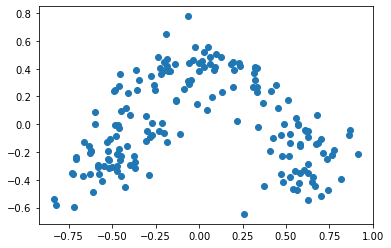

In [3]:
import csv
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np

def main():
    X, attributes = input_data()

    # print(X)
    # print(X.shape)
    pca_array = normalize(X)
    print(pca_array)
    pca, pca_array = run_PCA(X, 2)
    visualize_2d_wine(pca_array)

def input_data():
    X = []
    attributes = []
    # 파일 읽기
    with open('attributes.txt') as f:
        attributes = f.readlines()
        # txt 파일에서 각각의 feature가 line 별로 정리되어 있으므로
        # readlines()로 한번에 읽기가 가능
    # attributes = [attr.replace('\n', '') for attr in attributes]
    attributes = [attr.strip() for attr in attributes]
    # print(attributes)
    
    csvreader = csv.reader(open('wine.csv'))
    for line in csvreader:
        # print(line)
        float_numbers = [float(num) for num in line]
        X.append(float_numbers)
        
    return np.array(X), attributes

def run_PCA(X, num_components):
    # 주성분의 수 : num_components
    # -> 몇 차원으로 줄일 것인지?
    pca = sklearn.decomposition.PCA(n_components = num_components)
    pca.fit(X)
    pca_array = pca.transform(X)
    # 13차원 -> 2차원 이므로 178 X 2 배열
    # print(pca_array)
    return pca, pca_array
    
def normalize(X):
    '''
    각각의 feature에 대해,
    178개의 데이터에 나타나는 해당하는 feature의 값이 최소 0, 최대 1이 되도록
    선형적으로 데이터를 이동시킨다.
    '''
    # 13개의 차원에 대해 각각 featurn 1개씩 처리
    for i in range(X.shape[1]):
        # 하나의 컬럼에 대한 모든 row를 가지고 온다
        # [:,i] i번째 컬럼에 대한 모든 row에서 자신의 최솟값을 제거
        X[:,i] = X[:,i] - np.min(X[:,i])
        X[:,i] = X[:,i] / np.max(X[:,i])

    return X
%matplotlib inline
def visualize_2d_wine(X):
    # 시각화
    plt.scatter(X[:,0], X[:,1])
    plt.savefig("wine_image.png")
    plt.show()

if __name__ == '__main__':
    main()

---

## K-Means 클러스터링
### 클러스터링, or 클러스터 분석
주어진 개체에서 비슷한 개체를 선별하고 묶는(grouping) 작업
K-Means 클러스터링은 주어진 데이터를 K개의 클러스터로 묶는 알고리즘

* num_clusters - 클러스터의 개수.
* initial_centroid_indices - 초기 중심점. 
* initial_centroid_indices가 [0, 1, 2]일때 initial_centroids 는 첫 번째, 두 번째, 그리고 세 번째 데이터 포인트

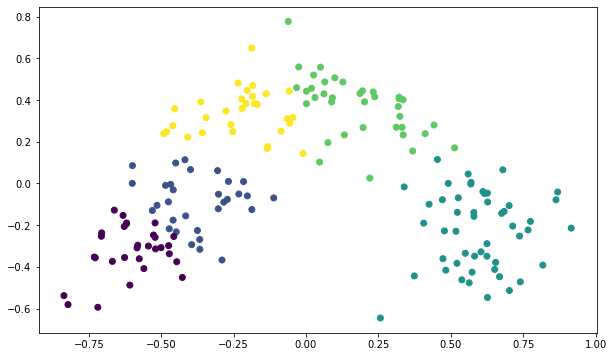

In [8]:
import sklearn.decomposition
import sklearn.cluster
import matplotlib.pyplot as plt
import numpy as np


def main():
    X, attributes = input_data()
    X = normalize(X)
    pca, pca_array = run_PCA(X, 2)
    # k가 3일 경우, 2일 경우, ... , 비교
    # labels = kmeans(pca_array, 5, [0, 1, 2, 3, 4]) # k가 5일 때
    labels = kmeans(pca_array, 5, [0, 30, 60, 90, 120]) # 시작점 조정
    #labels = kmeans(pca_array, 3, [0, 1, 2]) # k가 3일 때 
    '''
    kmeans = 시작점에 민감하게 반응하는 알고리즘
    시작점을 랜덤으로 정해서 그 중에 가장 클러스터링이 잘된 것을 리턴한다.
    '''
    
    # print(labels)
    visualize_2d_wine(pca_array, labels)

def input_data():
    X = []
    attributes = []
    
    with open('wine.csv') as fp:
        for line in fp:
            X.append([float(x) for x in line.strip().split(',')])
    
    with open('attributes.txt') as fp:
        attributes = [x.strip() for x in fp.readlines()]

    return np.array(X), attributes

def run_PCA(X, num_components):
    pca = sklearn.decomposition.PCA(n_components=num_components)
    pca.fit(X)
    pca_array = pca.transform(X)

    return pca, pca_array

def kmeans(X, num_clusters, initial_centroid_indices):
    import time
    # print(X)
    
    N = len(X)
    centroids = X[initial_centroid_indices]
    labels = np.zeros(N)
    
    while True:
        '''
        Step 1. 각 데이터 포인트 i 에 대해 가장 가까운
        중심점을 찾고, 그 중심점에 해당하는 클러스터를 할당하여
        labels[i]에 넣는다.
        가까운 중심점을 찾을 때는, 유클리드 거리를 사용
        미리 정의된 distance 함수를 사용
        '''
        is_changed = False
        for i in range(N):
            distances = []
            for k in range(num_clusters):
                # i와 k번째 클러스터의 중심점 
                # X[i]와 centroids[k]
                k_dist = distance(X[i], centroids[k])
                distances.append(k_dist)
                # print(distances)
                 
            # 각각의 데이터 포인트에서 가장 가까운 중심점을 구하기  
            # 첫 번째 포인트에서 가까운 것 : label 0
            # 두 번째 : label 1 / 세 번째 : label 2
            # labels와 distances가 바뀌었는지 확인
            if labels[i] != np.argmin(distances):
                is_changed = True
            labels[i] = np.argmin(distances) 
            # print(labels)
            
                
        '''
        Step 2. 할당된 클러스터를 기반으로 새로운 중심점을 계산한다.
        중심점은 클러스터 내 데이터 포인트들의 위치의 *산술 평균*
        '''
        for k in range(num_clusters):
            x = X[labels == k][:,0]
            y = X[labels == k][:,1]
            # print(x)
            x = np.mean(x)
            y = np.mean(y)
            centroids[k] = [x, y]
        # print(centroids)
        '''
        Step 3. 만약 클러스터의 할당이 바뀌지 않았다면 알고리즘을 끝낸다.
        아니라면 다시 반복한다.
        '''
        if not is_changed:
            break
            
    return labels
            
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
    
def normalize(X):
    for dim in range(len(X[0])):
        X[:, dim] -= np.min(X[:, dim])
        X[:, dim] /= np.max(X[:, dim])
    return X

'''
이전에 더해, 각각의 데이터 포인트에 색을 입히는 과정도 진행한다.
'''

def visualize_2d_wine(X, labels):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:,0], X[:,1],c=labels)
    plt.savefig("wine_clustering_image.svg", format="svg")

if __name__ == '__main__':
    main()

---